# Преобразование Фурье

В библиотеке numpy содержится всё что нужно для дискретного преобразования Фурье. Всё это лежит в numpy.fft. 


Общий случай: сигнал может быть как из действительных чисел, так и из комплексных.

In [ ]:
import numpy.fft as fft
fft.fft(a, n=None, axis=-1) #—ьб прямое одномерное ДПФ.
fft.ifft(a, n=None, axis=-1) #— обратное одномерное ДПФ.

a — "сигнал", входной массив (массив numpy, array или даже питоновский список или кортеж, если в нём только числа). Массив может быть и многомерным, тогда будет вычисляться много ОДНОМЕРНЫХ ПФ по строкам (по умолчанию) или столбцам, в зависимости от параметра axis.

Например, a — двухмерный, a[n][m]: при axis=1 или -1 будет такое (под fourier(a...)
[fourier(a[0][j]), fourier(a[1][j]), ... foirier(a[n][j])]
При axis=0 такое:
[fourier(a[i][0]), fourier(a[i][1]), ... foirier(a[i][m])]
n — сколько элементов массива брать. Если меньше длины массива, то обрезать, если больше, то дополнить нулями, по умолчанию len(a)

In [ ]:
fft2(a, s=None, axes=(-2, -1)) #— прямое двухмерное ПФ.
ifft2(a, s=None, axes=(-2, -1)) #— обратное двухмерное ПФ.
fftn(a, s=None, axes=None) #— прямое многомерное ПФ.
ifftn(a, s=None, axes=None)# — обратное многомерное ПФ.

Всё так же, как и для одномерных, но s и axes теперь кортежи для каждой размерности. О размерности fftn, ifftn догадаются по размерности входных массивов или s и axes.

Когда сигнал действительный (real) (пожалуй, самый распространённый случай).

In [ ]:
rfft(a, n=None, axis=-1) #— прямое одномерное ДПФ (для действительных чисел).
irfft(a, n=None, axis=-1) #— обратное одномерное ДПФ.
rfft2(a, s=None, axes=(-2, -1))# — прямое двухмерное ДПФ.
irfft2(a, s=None, axes=(-2, -1))# — обратное двухмерное ДПФ.
rfftn(a, s=None, axes=None)# — прямое многомерное ДПФ.
irfftn(a, s=None, axes=None)# — обратное многомерное ДПФ.

Всё так же, как и для общего случая.

Все эти функции возвращают массив соответствующей размерности, в котором записан результат ДПФ. Разница такая. Если длина входного массива (или какой-либо его размерности) N, то в общем случае (с комплексным сигналом) длина выходного массива N.

Там содержатся сначала положительные частоты от нуля до частоты Котельникова (Найквиста), потом отрицательные в порядке возрастания.

В случае действительного сигнала отрицательные частоты полностью симметричны положительным, и тогда нет нужды их записывать: длина выходного массива N/2+1, частоты от нуля до частоты Котельникова.

Кроме того, есть вспомогательные функции

In [ ]:
fftfreq(n, d=1.0)# — возвращает частоты для выходных массивов функций fft*.
rfftfreq(n, d=1.0)# — возвращает частоты для выходных массивов функций rfft*.
#n — длина входного массива, d — период дискретизации (обратная частота дискретизации).
fftshift(x, axes=None)# — преобразует массив (с результатом ДПФ, от функций fft*) так, чтобы нулевая частота была в центре.
ifftshift(x, axes=None)# — делает обратную операцию.

Приведём такой пример. Допустим, записали мы микрофоном какой-то шум, и надо определить, есть ли там какой-нибудь тон.

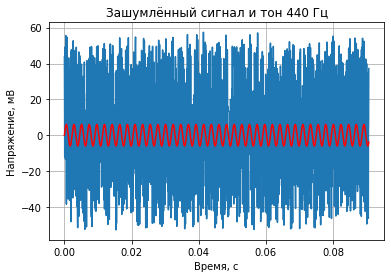

In [6]:
from numpy import array, arange, abs as np_abs
from numpy.fft import rfft, rfftfreq
from numpy.random import uniform
from math import sin, pi
import matplotlib.pyplot as plt
# а можно импортировать numpy и писать: numpy.fft.rfft
FD = 22050 # частота дискретизации, отсчётов в секунду
# а это значит, что в дискретном сигнале представлены частоты от нуля до 11025 Гц (это и есть теорема Котельникова)
N = 2000 # длина входного массива, 0.091 секунд при такой частоте дискретизации
# сгенерируем сигнал с частотой 440 Гц длиной N
pure_sig = array([6.*sin(2.*pi*440.0*t/FD) for t in range(N)])
# сгенерируем шум, тоже длиной N (это важно!)
noise = uniform(-50.,50., N)
# суммируем их и добавим постоянную составляющую 2 мВ (допустим, не очень хороший микрофон. Или звуковая карта или АЦП)
sig = pure_sig + noise + 2.0 # в numpy так перегружена функция сложения
# вычисляем преобразование Фурье. Сигнал действительный, поэтому надо использовать rfft, это быстрее, чем fft
spectrum = rfft(sig)

# нарисуем всё это, используя matplotlib
# Сначала сигнал зашумлённый и тон отдельно
plt.plot(arange(N)/float(FD), sig) # по оси времени секунды!
plt.plot(arange(N)/float(FD), pure_sig, 'r') # чистый сигнал будет нарисован красным
plt.xlabel(u'Время, c') # это всё запускалось в Python 2.7, поэтому юникодовские строки
plt.ylabel(u'Напряжение, мВ')
plt.title(u'Зашумлённый сигнал и тон 440 Гц')
plt.grid(True)
#plt.show()



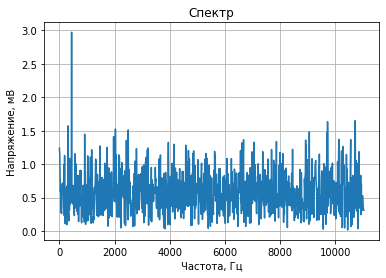

In [7]:
# Потом спектр
plt.plot(rfftfreq(N, 1./FD), np_abs(spectrum)/N)
# rfftfreq сделает всю работу по преобразованию номеров элементов массива в герцы
# нас интересует только спектр амплитуд, поэтому используем abs из numpy (действует на массивы поэлементно)
# делим на число элементов, чтобы амплитуды были в милливольтах, а не в суммах Фурье. Проверить просто — постоянные составляющие должны совпадать в сгенерированном сигнале и в спектре
plt.xlabel(u'Частота, Гц')
plt.ylabel(u'Напряжение, мВ')
plt.title(u'Спектр')
plt.grid(True)
#plt.show()